In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 1 数据准备

In [2]:
from fastai.vision import *

In [3]:
# 设置数据路径
path = Path('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6')
path
path.as_posix()

PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6')

'/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6'

In [4]:
path.ls()

[PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/train.csv'),
 PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/test.csv'),
 PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/train'),
 PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/sample_submission.csv'),
 PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/test'),
 PosixPath('/home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6/models')]

In [5]:
name_id = ['empty', 'deer', 'moose', 'squirrel', 'rodent', 'small_mammal', 'elk', 'pronghorn_antelope', 'rabbit,bighorn_sheep', 'fox', 'coyote', 'black_bear', 
           'raccoon', 'skunk', 'wolf', 'bobcat', 'cat', 'dog', 'opossum', 'bison', 'mountain_goat', 'mountain_lion']

- 这里每个图片都会有多个标签

In [6]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [7]:
test_df = pd.read_csv(path/'test.csv')
test_df.head()

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,2016-01-03 11:30:56,bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bce932f6-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
1,2016-01-03 11:30:57,bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg,2,bce932f7-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
2,2016-01-03 11:30:58,bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg,3,bce932f8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
3,2016-01-03 11:30:59,bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg,4,bce932f9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
4,2016-01-03 11:31:00,bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg,5,bce932fa-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726


In [13]:
# 图片变换
tfms = get_transforms(do_flip=True, max_rotate=20, max_zoom=1.3, max_lighting=0.4,
                      max_warp=0.4, p_affine=1., p_lighting=1.)

In [14]:
test_set = ImageList.from_df(test_df, path=path, cols='id', folder='test', suffix='.jpg')

In [15]:
# 构建数据集
np.random.seed(42)
# 使用 ImageList 是因为图像是多标签的
src = (ImageList.from_df(train_df, path=path, folder='train', cols='id', suffix='.jpg')
       .split_by_rand_pct(0.1)
       .label_from_df(cols='category_id')
       .add_test(test_set)
      )

- 图像大小设置为 32

In [16]:
img_size=32
bs=64

In [17]:
data = (src.transform(tfms, size=img_size)
        .databunch(bs=bs).normalize(imagenet_stats))

In [18]:
data

ImageDataBunch;

Train: LabelList (176670 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
19,19,0,0,3
Path: /home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6;

Valid: LabelList (19629 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,19,0
Path: /home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6;

Test: LabelList (153730 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /home/lyc/Datasets/kaggle/competitions/iwildcam-2019-fgvc6

In [19]:
data.c

14

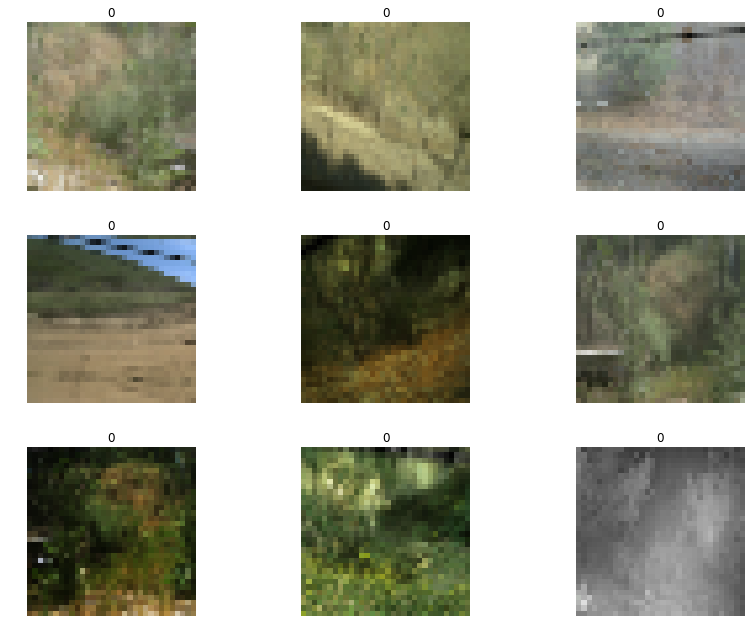

In [20]:
# 查看部分数据
data.show_batch(rows=3, figsize=(12,9))

- 使用 densenet169 作为模型

In [21]:
arch = models.densenet169

In [22]:
f1 = partial(fbeta, beta=1)

In [23]:
learn = cnn_learner(data, arch, metrics=[f1, accuracy]).mixup()

/home/lyc/miniconda3/envs/torch36/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


- 寻找学习率

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


- 查看学习率情况并作出选择

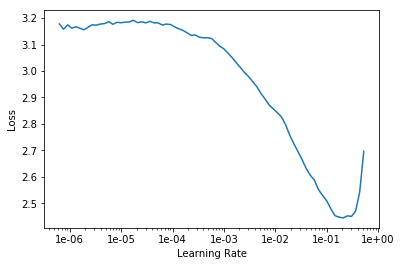

In [25]:
learn.recorder.plot()

- 根据上述图像，我们选择学习率为 0.01 Find the thing with the steepest slope 

In [26]:
lr = 0.01

- 训练模型

In [ ]:
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,fbeta,accuracy,time


- 保存第一阶段的结果

In [ ]:
learn.save('stage-1')

- unfreeze 并训练浅层网络的权重，微调过程

In [ ]:
learn.unfreeze()

- 再次查找最佳学习率

In [ ]:
learn.lr_find()
learn.recorder.plot()

- 根据上述图，选择 lr1=1e-4
- 再次训练浅层网络并保存结果
- 使用判别式学习率

In [19]:
lr1 = 1e-4
learn.fit_one_cycle(10, slice(lr1, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099940,0.092671,0.950885,0.917816,00:58
1,0.103500,0.098629,0.948334,0.913520,00:58
2,0.098534,0.095712,0.953348,0.912435,00:58
3,0.095803,0.088999,0.949649,0.921507,00:58
4,0.091764,0.087697,0.956538,0.924196,00:58
5,0.088745,0.086715,0.959314,0.925645,00:58
6,0.085800,0.083977,0.956960,0.928144,00:58
7,0.082796,0.083269,0.958224,0.929402,00:58
8,0.081954,0.082919,0.959016,0.928458,00:58
9,0.080978,0.082379,0.958791,0.929013,00:59


In [20]:
learn.save('stage-2')
learn.export()

## 图像大小设置为 128

- 为了避免内存超出，这里将上述训练好的模型再次导入，并清理内存
- 仍旧使用之前的学习器，只是简单地更换数据

In [21]:
learn.load('stage-2');

In [ ]:
bs=32
img_sz=128

In [22]:
data = (src.transform(tfms, size=img_sz)
        .databunch(bs=bs).normalize(imagenet_stats))

learn.data = data
data

ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,haze;primary;water,agriculture;clear;cultivation;primary;water
Path: /home/lyc/.fastai/data/planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
clear;primary;road,clear;primary;water,clear;conventional_mine;habitation;primary;road;water,cloudy,agriculture;clear;cultivation;cultivation;habitation;primary;road;water
Path: /home/lyc/.fastai/data/planet;

Test: None

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

- 我们仍然使用之前定义的模型
- 再次训练之前，我们需要将浅层结构进行 freeze，不训练浅层结构的权重

In [23]:
learn.freeze()

- 寻找最佳学习率并再次训练

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


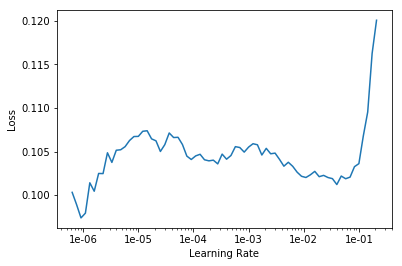

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
lr2=1e-3

In [26]:
learn.fit_one_cycle(10, slice(lr2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.095802,0.091555,0.953973,0.920080,02:06
1,0.087496,0.086812,0.955019,0.925869,02:05
2,0.091371,0.085162,0.955267,0.926391,02:06
3,0.085818,0.084229,0.956604,0.926557,02:06
4,0.083872,0.083697,0.957011,0.928295,02:06
5,0.085426,0.083308,0.957955,0.928580,02:06
6,0.081555,0.083816,0.956393,0.927198,02:06
7,0.081699,0.082743,0.958079,0.928952,02:06
8,0.083981,0.082813,0.958827,0.929265,02:06
9,0.085018,0.082495,0.957999,0.929548,02:06


In [27]:
learn.save('stage-1-128')

- 继续进行第二阶段的微调

In [28]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


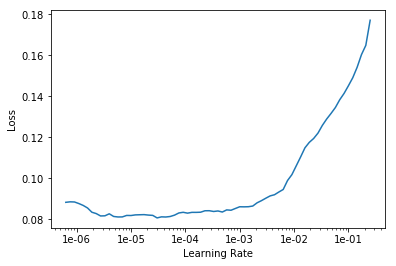

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
lr3 = 1e-4

In [31]:
learn.fit_one_cycle(10, slice(lr3, lr2/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.085336,0.082664,0.958798,0.929768,02:47
1,0.084961,0.082358,0.956800,0.929465,02:47
2,0.084302,0.083963,0.958355,0.927583,02:47
3,0.083027,0.082652,0.957795,0.929133,02:47
4,0.084788,0.081678,0.957127,0.930079,02:46
5,0.079410,0.081487,0.957068,0.930033,02:47
6,0.078438,0.081064,0.958958,0.930365,02:47
7,0.078604,0.080470,0.958609,0.930833,02:47
8,0.077555,0.080476,0.959583,0.930857,02:47
9,0.075244,0.080617,0.958667,0.930577,02:47


- 查看训练损失

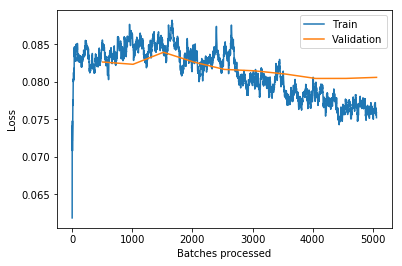

In [32]:
learn.recorder.plot_losses()

- 保存结果

In [33]:
learn.save('stage-2-128')

In [34]:
learn.export()

- 继续增大图片尺寸

In [ ]:
learn.load('stage-2-128');

In [ ]:
img_sz=128
bs=16

In [ ]:
data = (src.transform(tfms, size=img_sz)
        .databunch(bs=bs).normalize(imagenet_stats))

learn.data = data
data

In [ ]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

## 测试集

In [35]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

- 重新加载学习器

In [36]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [37]:
preds[:5]

tensor([[9.9642e-01, 1.1537e-06, 1.5298e-03, 2.1646e-05, 8.6779e-06, 8.5943e-01,
         1.1688e-04, 2.0228e-06, 1.2460e-01, 4.2248e-02, 5.1099e-02, 6.9181e-02,
         9.7037e-01, 9.4687e-01, 2.7331e-05, 3.7488e-04, 6.8113e-02],
        [1.4662e-02, 5.9561e-07, 1.2257e-04, 1.4832e-02, 4.9299e-04, 9.9914e-01,
         2.5366e-05, 4.9937e-06, 2.5061e-03, 7.2148e-03, 2.3289e-04, 6.7324e-04,
         9.9987e-01, 1.9098e-03, 1.7451e-03, 2.3856e-05, 6.4403e-03],
        [5.6921e-01, 3.6503e-04, 4.9448e-01, 4.4104e-05, 5.8525e-05, 9.4669e-01,
         6.1759e-04, 1.7965e-04, 2.8780e-02, 2.5915e-03, 4.4797e-02, 3.8414e-04,
         9.5782e-01, 3.0225e-02, 4.2598e-05, 1.7232e-03, 2.6884e-01],
        [7.6598e-01, 3.8834e-04, 1.3012e-02, 8.5999e-04, 1.0586e-03, 6.3710e-02,
         8.9973e-04, 7.4046e-04, 2.0846e-01, 5.6288e-02, 7.7736e-04, 9.4645e-01,
         9.9704e-01, 8.0468e-02, 1.7233e-03, 6.4144e-03, 8.9607e-01],
        [9.9955e-03, 2.8895e-06, 1.2104e-04, 2.5611e-01, 1.7034e-04, 9.9

In [38]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [39]:
labelled_preds[:5]

['agriculture clear primary road',
 'clear primary',
 'agriculture bare_ground clear primary water',
 'agriculture cultivation partly_cloudy primary water',
 'blooming clear primary']

In [40]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [41]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [42]:
df.to_csv(path/'submission.csv', index=False)

## 提交结果

In [43]:
!kaggle competitions submit -c iwildcam-2019-fgvc6 -f {path}/submission.csv -m "submit01"

100%|███████████████████████████████████████| 2.21M/2.21M [00:16<00:00, 142kB/s]
Successfully submitted to Planet: Understanding the Amazon from Space